In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabla_pequeña = pd.read_csv("tabla_pequeña.csv")
tabla_pequeña.head(5)

,Unnamed: 0,indices,edad,genero,pais,formacion_2,puesto_trabajo,años_programando,lenguajes_utilizados,lenguajes_recomendados,...,fuente_conocimiento_reddit,fuente_conocimiento_kaggle,fuente_conocimiento_course,fuente_conocimiento_youtube,fuente_conocimiento_podcast,fuente_conocimiento_blogs,fuente_conocimiento_journal_publicacions,fuente_conocimiento_slack_communities,fuente_conocimiento_none,fuente_conocimiento_otros
0,0,0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,1,1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
2,2,2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Python,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
4,4,4,45-49,Man,India,Doctoral degree,Other,< 1 years,"Python, C, MATLAB",Python,...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [3]:
tabla_pequeña.columns

Index(['Unnamed: 0', 'indices', 'edad', 'genero', 'pais', 'formacion_2',
       'puesto_trabajo', 'años_programando', 'lenguajes_utilizados',
       'lenguajes_recomendados', 'herramientas_uso', 'librerias_visualizacion',
       'años_usando_machine', 'sector_trabajo_actual', 'tamaño_empresa',
       'personas_dpt_data', 'salario_anual', 'inversion_dpt_machine_5años',
       'plataforma_coursera', 'plataforma_edx',
       'plataforma_kaggle_learn_courses', 'plataforma_data_camp',
       'plataforma_fast_ai', 'plataforma_udacity', 'plataforma_udemy',
       'plataforma_linkedin_learning',
       'plataforma_cloud_certification_programs',
       'plataforma_university_courses', 'plataforma_none', 'plataforma_otros',
       'fuente_conocimiento_twitter', 'fuente_conocimiento_email',
       'fuente_conocimiento_reddit', 'fuente_conocimiento_kaggle',
       'fuente_conocimiento_course', 'fuente_conocimiento_youtube',
       'fuente_conocimiento_podcast', 'fuente_conocimiento_blogs',
       

In [32]:
tabla_pequeña.isnull().sum()

Unnamed: 0                                      0
indices                                         0
edad                                            0
genero                                          0
pais                                            0
formacion_2                                     0
puesto_trabajo                                  0
años_programando                                0
lenguajes_utilizados                         1032
lenguajes_recomendados                       1033
herramientas_uso                             1253
librerias_visualizacion                      2003
años_usando_machine                          2219
sector_trabajo_actual                        9648
tamaño_empresa                               9722
personas_dpt_data                            9847
salario_anual                               10582
inversion_dpt_machine_5años                 10790
plataforma_coursera                         16324
plataforma_edx                              22945


Salario medio en función de: Experiencia/ genero/ pais/ sector (q25,q2, q1, q3,q6)

In [4]:
dfp1 = tabla_pequeña[["edad", "genero", "pais", "años_programando", "salario_anual"]]
dfp1.head(5)

,edad,genero,pais,años_programando,salario_anual
0,50-54,Man,India,5-10 years,"25,000-29,999"
1,50-54,Man,Indonesia,20+ years,"60,000-69,999"
2,22-24,Man,Pakistan,1-3 years,$0-999
3,45-49,Man,Mexico,20+ years,"30,000-39,999"
4,45-49,Man,India,< 1 years,"30,000-39,999"


Creamos una columna nueva agrupando los paises por continentes

In [5]:
def continentes(colum):
    asia = ['India','Indonesia','Pakistan','Japan','China','Malaysia','Thailand','Nepal','Russia','Singapore','Turkey','Hong Kong (S.A.R.)','Iran, Islamic Republic of...','Viet Nam',
            'Israel','Bangladesh','Tunisia','Saudi Arabia','Taiwan','South Korea','Philippines','Sri Lanka','United Arab Emirates','Kazakhstan','Iraq']
    america = ['United States of America','Mexico','Brazil','Peru','Ecuador','Argentina','Colombia','Canada','Chile']
    oceania = "Australia"
    africa = ['Nigeria','South Africa','Ghana','Uganda','Egypt','Morocco','Algeria','Kenya','Ethiopia']
    europa = [ 'Greece','Belgium','Italy','Norway','Czech Republic''Poland','Spain','United Kingdom of Great Britain and Northern Ireland','France','Switzerland','Netherlands',
                'Denmark','Germany','Sweden','Ireland','Portugal','Turkey','Ukraine', 'Romania','Austria','Belarus']                  
    if colum in asia:
        return "Asia"
    elif colum in america:
        return "America"
    elif colum in oceania:
        return "Oceania"
    elif colum in africa:
        return "Africa"
    elif colum in europa:
        return "Europa"
    else:
        return "Otros"



In [6]:
tabla_pequeña["continente"] = (tabla_pequeña["pais"].apply(continentes))

In [7]:
tabla_pequeña.sample()

,Unnamed: 0,indices,edad,genero,pais,formacion_2,puesto_trabajo,años_programando,lenguajes_utilizados,lenguajes_recomendados,...,fuente_conocimiento_kaggle,fuente_conocimiento_course,fuente_conocimiento_youtube,fuente_conocimiento_podcast,fuente_conocimiento_blogs,fuente_conocimiento_journal_publicacions,fuente_conocimiento_slack_communities,fuente_conocimiento_none,fuente_conocimiento_otros,continente
22342,22342,22342,22-24,Man,France,Master’s degree,Data Scientist,3-5 years,Python,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Europa


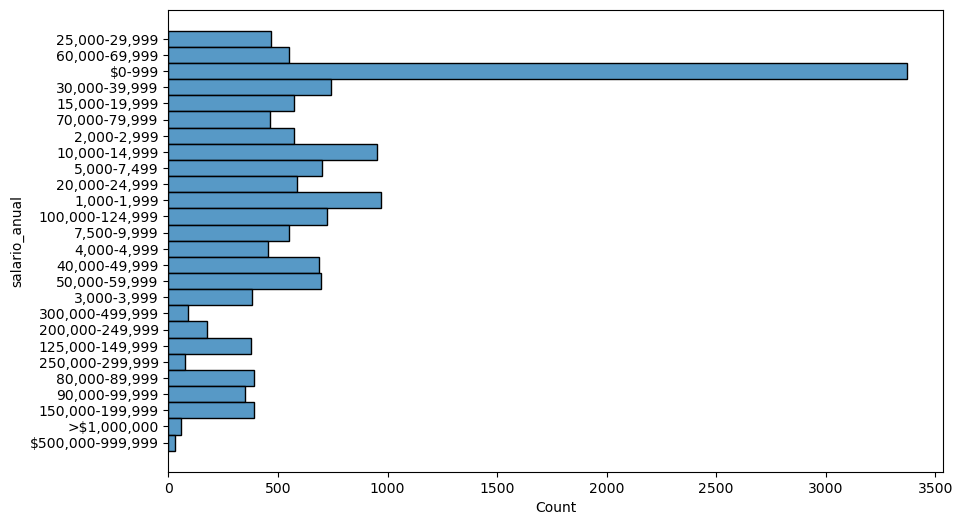

In [8]:
plt.figure(figsize=(10,6))

fig = sns.histplot(y="salario_anual", data=dfp1)

plt.show()

In [10]:
# inciamos la figura
plt.figure(figsize =(8,4))
# elegimos el método boxplot y especificamos la columna que queremos usar
fig = sns.boxplot( x =‘bill_length_mm’, data = df_penguin)
# cambiamos el nombre del eje x. Recordad que este no es obligatorio en seaborn ya que nos lo genera automaticamente.
fig.set(xlabel=‘Longitud de la aleta en mm’)
# ponemos título a la gráfica
fig.set_title(‘Boxplot de la longitud de la aleta’)
# mostramos la gráfica
plt.show()

SyntaxError: invalid character '‘' (U+2018) (3946038417.py, line 4)

Nos damos cuenta de que no podemos usar el boxplot porque tenemos que cambiar el tipo de dato de la columna salario.

In [11]:
plt.figure()

fig = sns.boxplot(x = "salario_anual", data=dfp1)

fig.set(ylabel="Longitud de la aleta en mm")





TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 640x480 with 0 Axes>

In [12]:
dfp1.head()

,edad,genero,pais,años_programando,salario_anual
0,50-54,Man,India,5-10 years,"25,000-29,999"
1,50-54,Man,Indonesia,20+ years,"60,000-69,999"
2,22-24,Man,Pakistan,1-3 years,$0-999
3,45-49,Man,Mexico,20+ years,"30,000-39,999"
4,45-49,Man,India,< 1 years,"30,000-39,999"


[Text(0.5, 0, 'Longitud de la aleta en mm')]

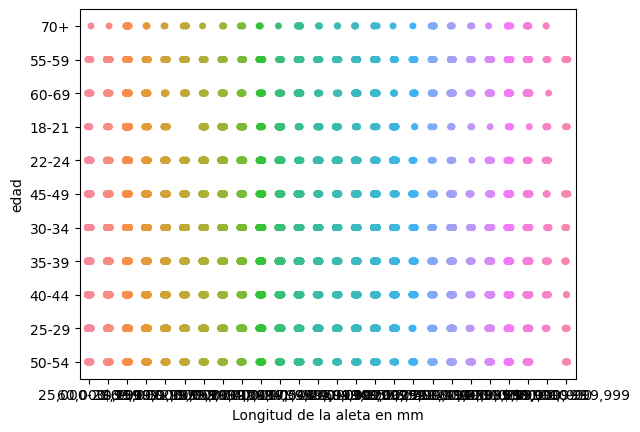

In [13]:
plt.figure()

fig = sns.stripplot(x = "salario_anual", y="edad",data=dfp1)

fig.set(xlabel="Longitud de la aleta en mm")

Intentamos hacer varias gráficas pero entre que el tipo de dato no es númerico, para el salario y que tenemos muchos registros decidimos probar a categorizar los datos del salario.

Hemos creado la columna de continente donde categorizamos los paises por su correspondiente continente.

Decidimos pedir ayuda para el tema del salario, no sabemos si picar directamente, guardar los dos rangos en listas, crear la media de los dos rangos...

In [14]:
dfp1["salario_anual"].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [33]:
dfp1[dfp1["salario_anual"] == '>$1,000,000']

,edad,genero,pais,años_programando,salario_anual
658,70+,Man,Italy,20+ years,">$1,000,000"
1831,55-59,Man,United States of America,20+ years,">$1,000,000"
1975,35-39,Man,Japan,5-10 years,">$1,000,000"
1987,22-24,Man,Pakistan,1-3 years,">$1,000,000"
2087,40-44,Man,France,10-20 years,">$1,000,000"
3556,40-44,Man,United States of America,20+ years,">$1,000,000"
4375,22-24,Woman,India,3-5 years,">$1,000,000"
4752,35-39,Nonbinary,United States of America,1-3 years,">$1,000,000"
5035,22-24,Man,Nepal,< 1 years,">$1,000,000"
5282,45-49,Man,United Kingdom of Great Britain and Northern I...,20+ years,">$1,000,000"


In [35]:
dfp11 = dfp1[dfp1["salario_anual"] == '>$1,000,000']

In [37]:
dfp11["salario_anual"].value_counts()

>$1,000,000    58
Name: salario_anual, dtype: int64

In [16]:
def sueldo_a_int(column):        
    try:
        return int(column.replace(",", "").replace("$","").replace(">","").split("-")[0])
    except:
        return np.nan

#fichero_peliculas["Year"] = (fichero_peliculas["Released_Year"].apply(año_a_int))

In [66]:
def sueldo_a_int_max(column):
    column2 = str(column).lower()
    if column2 == "nan":
        return np.nan
    else:
        lista = column2.replace(",", "").replace("$","").replace(">","").split("-")
        print(lista)
        print(len(lista))
        if len(lista) == 1:
            return 1000000
        else:
            return lista[1]

In [75]:
dfp1["rango_salario_minimo"] = (dfp1["salario_anual"].apply(sueldo_a_int))

/tmp/ipykernel_2483/1105135628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp1["rango_salario_minimo"] = (dfp1["salario_anual"].apply(sueldo_a_int))


In [76]:
dfp1

,edad,genero,pais,años_programando,salario_anual,rango_salario_maximo,rango_salario_minimo
0,50-54,Man,India,5-10 years,"25,000-29,999",29999,25000.0
1,50-54,Man,Indonesia,20+ years,"60,000-69,999",69999,60000.0
2,22-24,Man,Pakistan,1-3 years,$0-999,999,0.0
3,45-49,Man,Mexico,20+ years,"30,000-39,999",39999,30000.0
4,45-49,Man,India,< 1 years,"30,000-39,999",39999,30000.0
...,...,...,...,...,...,...,...
25968,30-34,Man,Egypt,1-3 years,"15,000-19,999",19999,15000.0
25969,22-24,Man,China,1-3 years,NaN,1000000,NaN
25970,50-54,Man,Sweden,I have never written code,$0-999,999,0.0
25971,45-49,Man,United States of America,5-10 years,NaN,1000000,NaN


In [77]:
dfp1["rango_salario_maximo"] = (dfp1["salario_anual"].apply(sueldo_a_int_max))

/tmp/ipykernel_2483/2523971154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp1["rango_salario_maximo"] = (dfp1["salario_anual"].apply(sueldo_a_int_max))


In [78]:
dfp1

,edad,genero,pais,años_programando,salario_anual,rango_salario_maximo,rango_salario_minimo
0,50-54,Man,India,5-10 years,"25,000-29,999",29999,25000.0
1,50-54,Man,Indonesia,20+ years,"60,000-69,999",69999,60000.0
2,22-24,Man,Pakistan,1-3 years,$0-999,999,0.0
3,45-49,Man,Mexico,20+ years,"30,000-39,999",39999,30000.0
4,45-49,Man,India,< 1 years,"30,000-39,999",39999,30000.0
...,...,...,...,...,...,...,...
25968,30-34,Man,Egypt,1-3 years,"15,000-19,999",19999,15000.0
25969,22-24,Man,China,1-3 years,NaN,1000000,NaN
25970,50-54,Man,Sweden,I have never written code,$0-999,999,0.0
25971,45-49,Man,United States of America,5-10 years,NaN,1000000,NaN


In [ ]:
plt.figure()

fig = sns.stripplot(x = "salario_anual", y="edad",data=dfp1)

fig.set(xlabel="Longitud de la aleta en mm")